In [20]:
import numpy as np, matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# Introduction:

The Time-Independent Schrödinger Equation is $$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi=E\psi$$ for a confined quantum particle in 1 dimension, with the Boundary Conditions $\psi(0)=\psi(L)=0$, an example of a **Regular Sturm-Liouville Eigenvalue Problem,** where 

- There exist an infinite set of real Eigenenergies $E_0<E_1<E_2...$ with the smallest Eigenenergy being $E_0$.
- The corresponding Eigenfunctions $\psi_0,\psi_1...$ are complete, meaning any piecewise smooth function $f(x)$ on $[0,L]$ can be constructed as a linear combination $f(x)\sim\sum_ia_i\psi_i$ of them.
- These Eigenfunctions are orthogonal, thus $\int_0^L\psi_i(x)\psi_j(x)\,dx=0$ when $i\neq j$.

The **Infinite Square Well** is a particular case of a confined quantum particle when $V=0$. Here, we have $$\psi_n=\sqrt\frac 2L\sin\bigg(\frac{n\pi x}L\bigg)$$ $$E_n=\frac{n^2\pi^2\hbar^2}{2mL^2}$$ In general, when $V$ is nonzero the Eigenfunctions $\psi_n$ are more complex but are also orthogonal and complete, as guaranteed by the Sturm-Liouville Theorem.

We'll now examine the usage of numerical techniques to find the Eigenfunctions as well as the Eigenenergies for a general case of nonzero potential.

# Mathematical Formulation:

Using the common convention $\hbar=1$ to set our units, and multiplying our equation by $m$:$$-\frac 12\frac{d^2\psi}{dx^2}+mV(x)\psi=mE\psi$$ We still have the $x$ quantity in the derivative, so we'll substitute some $z=x/L$, yielding $$-\frac 12\frac{d^2\psi}{dz^2}+mL^2V(z)\psi=mL^2E\psi$$ and of course, $\psi(z=0)=\psi(z=1)=0$. This is much easier to tackle numerically now, we're just required to define $mL^2V$ as opposed to just $V$.


In discrete form, this becomes approximately $$\frac{d^2f}{dx^2}\bigg|_{x=k\delta x}=\frac{f_{k+1}+f_{k-1}-2f_k}{\delta x^2}$$ where $f_k\equiv f(k\delta x)$, using discrete intervals $\delta z$. This can be rewritten as $$-\frac 12\frac{\psi_{k+1}+\psi_{k-1}-2\psi_k}{\delta z^2}+mL^2V_k\psi_k=mL^2E\psi_k$$ and so $$-\frac 1{2\delta z^2}\psi_{k+1}+\bigg(\frac 1{\delta z^2}+mL^2V_k\bigg)\psi_k-\frac 1{2\delta z^2}\psi_{k-1}=mL^2E\psi_j$$

This is essentially a large system of linear equations: 
- $\displaystyle-\frac 1{2\delta z^2}\psi_{2}+\bigg(\frac 1{\delta z^2}+mL^2V_1\bigg)\psi_1-\frac 1{2\delta z^2}\psi_{0}=mL^2E\psi_1$ for $k=1$,
- $\displaystyle-\frac 1{2\delta z^2}\psi_{3}+\bigg(\frac 1{\delta z^2}+mL^2V_2\bigg)\psi_2-\frac 1{2\delta z^2}\psi_{1}=mL^2E\psi_2$ for $k=2$, 

...all until we get to $\displaystyle-\frac 1{2\delta z^2}\psi_{N}+\bigg(\frac 1{\delta z^2}+mL^2V_{N-1}\bigg)\psi_{N-1}-\frac 1{2\delta z^2}\psi_{N-2}=mL^2E\psi_{N-1}$ for $k=N$ where $N=\delta y^{-1}$ is the number of poimts we use in the interval $z\in [0,1]$.

This can be expressed as a Tridiagonal Matrix when we recall the Boundary Conditions $\psi_0=\psi_N=0$:$$\large\begin{bmatrix}\frac 1{\delta z^2}+mL^2V_1&-\frac 1{2\delta z^2}&0&0...\\-\frac 1{2\delta z^2}&\frac 1{\delta z^2}+mL^2V_2&-\frac 1{2\delta z^2}&0...\\...&...&...&-\frac 1{2\delta z^2}\\... 0&0&-\frac 1{2\delta z^2}&\frac 1{\delta z^2}+mL^2V_{N-1}\end{bmatrix}\begin{bmatrix}\psi_1\\\psi_2\\\psi_3\\\psi_{N-1}\end{bmatrix}=mL^2E\begin{bmatrix}\psi_1\\\psi_2\\...\\\psi_{N-1}\end{bmatrix}$$ To solve this problem, we just need the Eigensolutions to the left-hand matrix. A **Toeplitz Matrix** could be of use here, a kind of tridiagonal matrix where the elements on each diagonal are the same. 

We'll start by defining $N$ and $\delta z$, and then $z$ and the term $mL^2V$ (which we'll call the *Potential Product*):

Text(0, 0.5, '$mL^2V(z)$ [V kg $\\mathrm{m}^2$]')

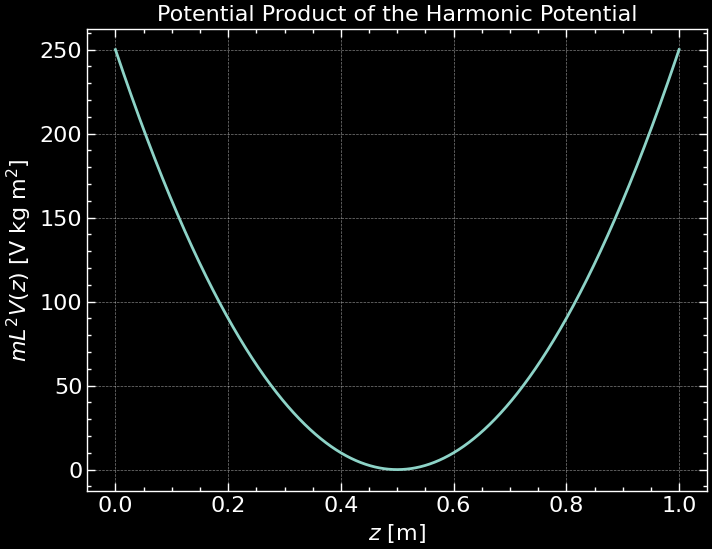

In [21]:
N = 2000
dz = 1 / N

z = np.linspace(0, 1, N + 1)
def pot_prod(z):
    return 1000 * (z - 1 / 2) ** 2

plt.plot(z, pot_prod(z))
plt.title('Potential Product of the Harmonic Potential')
plt.xlabel(r'$z$ [m]')
plt.ylabel(r'$mL^2V(z)$ [V kg $\mathrm{m}^2$]')

In [22]:
d = dz ** (-2) + pot_prod(z)[1:-1]
e = -0.5 * dz ** (-2) * np.ones(len(d) - 1)

w, v = eigh_tridiagonal(d, e)
v

array([[ 3.44542180e-06,  1.45430085e-05,  4.02899950e-05, ...,
        -1.97736494e-04,  2.99255038e-04, -2.98292039e-04],
       [ 6.89123488e-06,  2.90873432e-05,  8.05827560e-05, ...,
         3.95448954e-04, -5.98485517e-04,  5.96559612e-04],
       [ 1.03378289e-05,  4.36343230e-05,  1.20881029e-04, ...,
        -5.93113448e-04,  8.97667030e-04, -8.94778406e-04],
       ...,
       [ 1.03378289e-05, -4.36343230e-05,  1.20881029e-04, ...,
        -5.93113448e-04, -8.97667030e-04, -8.94778406e-04],
       [ 6.89123488e-06, -2.90873432e-05,  8.05827560e-05, ...,
         3.95448954e-04,  5.98485517e-04,  5.96559612e-04],
       [ 3.44542180e-06, -1.45430085e-05,  4.02899950e-05, ...,
        -1.97736494e-04, -2.99255038e-04, -2.98292039e-04]])

Plotting the Eigenfunctions and the Probability Densities:

Text(0, 0.5, '$\\psi_i(z)$')

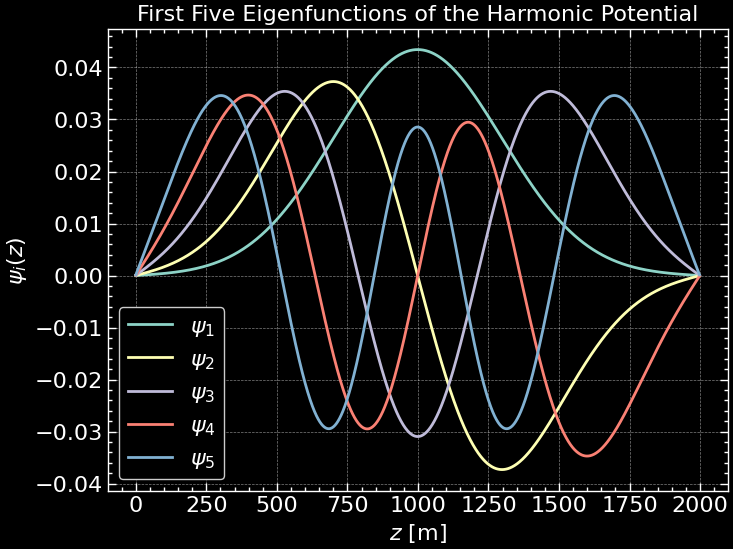

In [23]:
plt.plot(v.T[0], label = r'$\psi_1$')
plt.plot(v.T[1], label = r'$\psi_2$')
plt.plot(v.T[2], label = r'$\psi_3$')
plt.plot(v.T[3], label = r'$\psi_4$')
plt.plot(v.T[4], label = r'$\psi_5$')

plt.title('First Five Eigenfunctions of the Harmonic Potential')
plt.legend()
plt.xlabel(r'$z$ [m]')
plt.ylabel(r'$\psi_i(z)$')

Text(0, 0.5, '$|\\psi_i(z)|^2$')

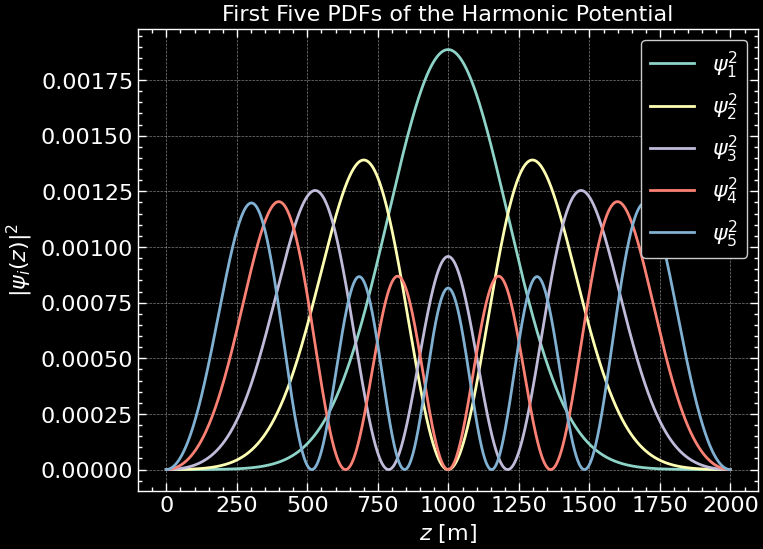

In [24]:
plt.plot(v.T[0] ** 2, label = r'$\psi_1^2$')
plt.plot(v.T[1] ** 2, label = r'$\psi_2^2$')
plt.plot(v.T[2] ** 2, label = r'$\psi_3^2$')
plt.plot(v.T[3] ** 2, label = r'$\psi_4^2$')
plt.plot(v.T[4] ** 2, label = r'$\psi_5^2$')

plt.title('First Five PDFs of the Harmonic Potential')
plt.legend()
plt.xlabel(r'$z$ [m]')
plt.ylabel(r'$|\psi_i(z)|^2$')

Let's also plot a bar graph of the Eigenenergies:

Text(0, 0.5, '$mL^2E_i/\\hbar^2$')

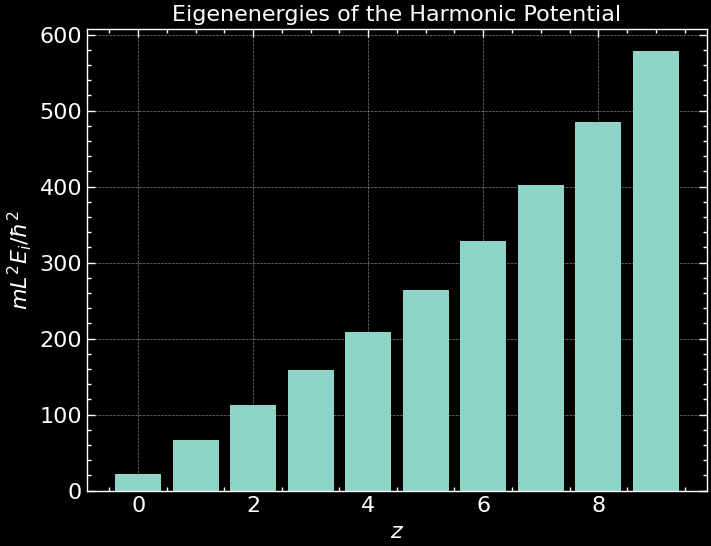

In [25]:
plt.bar(np.arange(0, 10, 1), w[0:10])

plt.title('Eigenenergies of the Harmonic Potential')
plt.xlabel(r'$z$')
plt.ylabel(r'$mL^2E_i/\hbar^2$')

Further, let's consider a Gaussian Spike of the form $$V\propto\exp\bigg[-\frac{(x-0.7)^2}{2\sigma^2}\bigg]$$ where $\sigma=0.05$, instead of the Harmonic Potential and see how it goes from there:

Text(0, 0.5, '$mL^2V(z)$ [V kg $\\mathrm{m}^2$]')

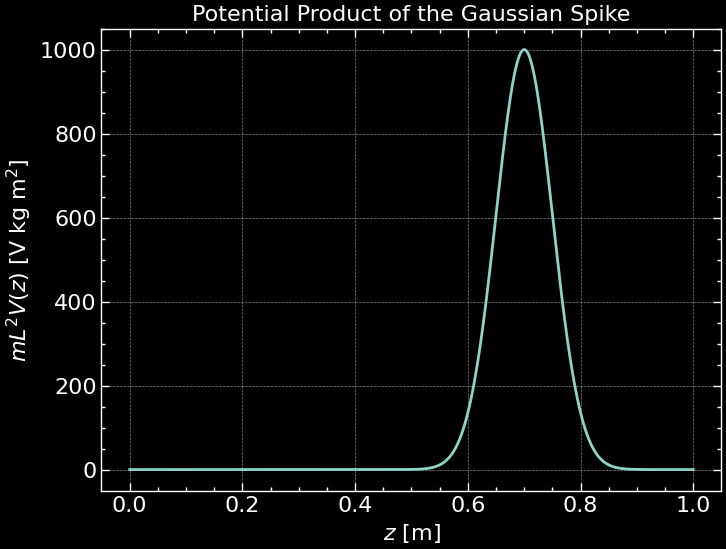

In [26]:
def pot_prod(z):
    return 1000 * np.exp(-(z - 0.7) ** 2 / (2 * 0.05 ** 2))

plt.plot(z, pot_prod(z))
plt.title('Potential Product of the Gaussian Spike')
plt.xlabel(r'$z$ [m]')
plt.ylabel(r'$mL^2V(z)$ [V kg $\mathrm{m}^2$]')

In [27]:
d = dz ** (-2) + pot_prod(z)[1:-1]
e = -0.5 * dz ** (-2) * np.ones(len(d) - 1)

w, v = eigh_tridiagonal(d, e)
v

array([[ 1.00343420e-04, -1.99257202e-04,  8.56522783e-07, ...,
         2.32173143e-05, -1.03035447e-09,  4.39179725e-14],
       [ 2.00686206e-04, -3.98509403e-04,  1.71300535e-06, ...,
        -4.64346754e-05,  2.06083998e-09, -8.78517891e-14],
       [ 3.01027727e-04, -5.97751606e-04,  2.56940750e-06, ...,
         6.96521298e-05, -3.09158756e-09,  1.31817300e-13],
       ...,
       [ 9.87111331e-08,  5.97366909e-07,  1.33187187e-03, ...,
         2.90589216e-04,  2.55942217e-05,  5.23615259e-07],
       [ 6.58077680e-08,  3.98252933e-07,  8.87949317e-04, ...,
        -1.93725819e-04, -1.70610064e-05, -3.48971929e-07],
       [ 3.29039878e-08,  1.99128965e-07,  4.43985080e-04, ...,
         9.68628120e-05,  8.52996084e-06,  1.74454496e-07]])

And finally, the Eigenfunctions, Probability Denisties and Eigenenergies:

Text(0, 0.5, '$\\psi_i(z)$')

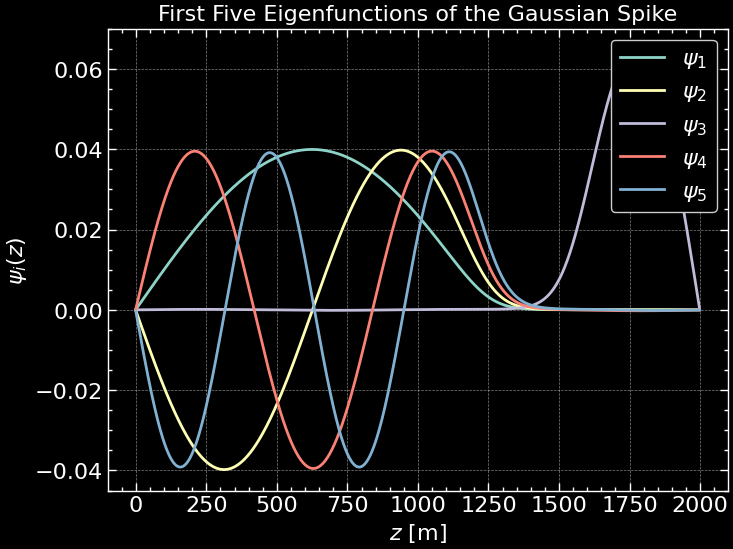

In [28]:
plt.plot(v.T[0], label = r'$\psi_1$')
plt.plot(v.T[1], label = r'$\psi_2$')
plt.plot(v.T[2], label = r'$\psi_3$')
plt.plot(v.T[3], label = r'$\psi_4$')
plt.plot(v.T[4], label = r'$\psi_5$')

plt.title('First Five Eigenfunctions of the Gaussian Spike')
plt.legend()
plt.xlabel(r'$z$ [m]')
plt.ylabel(r'$\psi_i(z)$')

Text(0, 0.5, '$|\\psi_i(z)|^2$')

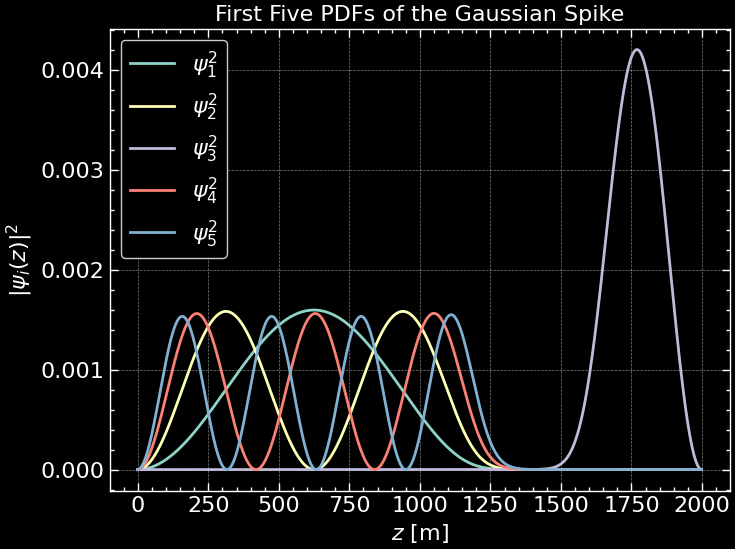

In [29]:
plt.plot(v.T[0] ** 2, label = r'$\psi_1^2$')
plt.plot(v.T[1] ** 2, label = r'$\psi_2^2$')
plt.plot(v.T[2] ** 2, label = r'$\psi_3^2$')
plt.plot(v.T[3] ** 2, label = r'$\psi_4^2$')
plt.plot(v.T[4] ** 2, label = r'$\psi_5^2$')

plt.title('First Five PDFs of the Gaussian Spike')
plt.legend()
plt.xlabel(r'$z$ [m]')
plt.ylabel(r'$|\psi_i(z)|^2$')

Text(0, 0.5, '$mL^2E_i/\\hbar^2$')

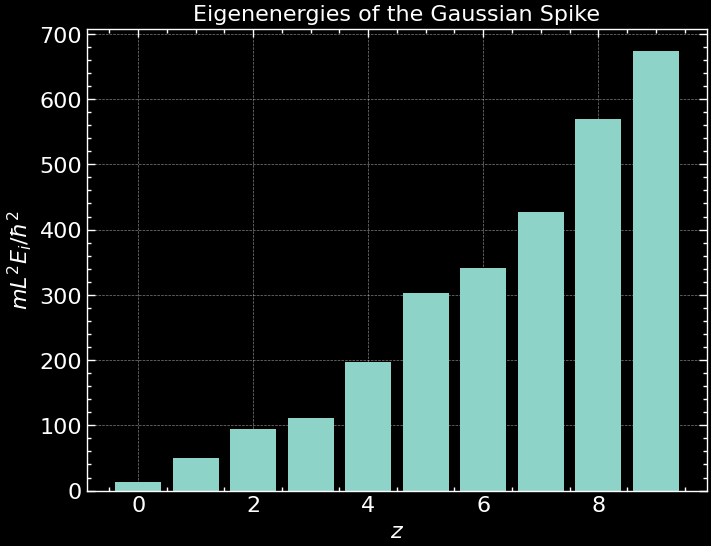

In [30]:
plt.bar(np.arange(0, 10, 1), w[0:10])

plt.title('Eigenenergies of the Gaussian Spike')
plt.xlabel(r'$z$')
plt.ylabel(r'$mL^2E_i/\hbar^2$')

$$\vec E_{out.}=\frac{\mu_0m\omega}{4\pi r^2}\Bigg[(1-\cos\theta)\,\hat r+\sin\theta\,\hat\theta\Bigg]$$ 
$$\vec E_{in.}=\frac{\mu_0m\omega r}{2\pi R^3}\Bigg[(1-\cos\theta)\,\,\hat r+\frac{\sin\theta}2\,\hat \theta\Bigg]$$

# Outside:

C:\Users\DELL\AppData\Local\Temp\ipykernel_14480\2200882436.py:33: RuntimeWarning: invalid value encountered in double_scalars
  E_r_norm[i, j, k] = E_r / E_norm
C:\Users\DELL\AppData\Local\Temp\ipykernel_14480\2200882436.py:34: RuntimeWarning: invalid value encountered in double_scalars
  E_theta_norm[i, j, k] = E_theta / E_norm
C:\Users\DELL\AppData\Local\Temp\ipykernel_14480\2200882436.py:35: RuntimeWarning: invalid value encountered in double_scalars
  E_phi_norm[i, j, k] = E_phi / E_norm


Text(0.5, 0, 'z')

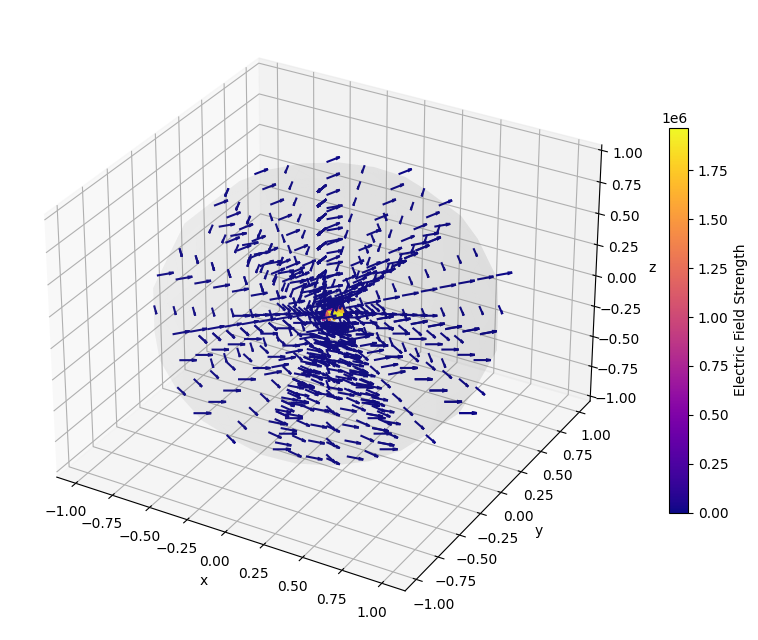

In [50]:
import matplotlib as mpl
def E(r, theta, phi):
    E_r = (1 - np.cos(theta)) / r ** 2
    E_theta = np.sin(theta) / r ** 2
    E_phi = 0 * phi
    
    return E_r, E_theta, E_phi

r_vals = np.linspace(0.001, 1, 10)
theta_vals = np.linspace(0, 2 * np.pi, 10)
phi_vals = np.linspace(0, 2 * np.pi, 10)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')

# Calculate electric field magnitude
E_mag = np.zeros((len(r_vals), len(theta_vals), len(phi_vals)))
for i, r in enumerate(r_vals):
    for j, theta in enumerate(theta_vals):
        for k, phi in enumerate(phi_vals):
            E_r, E_theta, E_phi = E(r, theta, phi)
            E_mag[i, j, k] = np.sqrt(E_r**2 + E_theta**2 + E_phi**2)

# Normalize electric field vectors
E_r_norm = np.zeros_like(E_mag)
E_theta_norm = np.zeros_like(E_mag)
E_phi_norm = np.zeros_like(E_mag)
for i in range(len(r_vals)):
    for j in range(len(theta_vals)):
        for k in range(len(phi_vals)):
            E_r, E_theta, E_phi = E(r_vals[i], theta_vals[j], phi_vals[k])
            E_norm = np.sqrt(E_r**2 + E_theta**2 + E_phi**2)
            E_r_norm[i, j, k] = E_r / E_norm
            E_theta_norm[i, j, k] = E_theta / E_norm
            E_phi_norm[i, j, k] = E_phi / E_norm

# Create colormap for electric field strength
E_mag_flat = E_mag.flatten()
E_mag_min, E_mag_max = E_mag_flat.min(), E_mag_flat.max()
norm = mpl.colors.Normalize(vmin=E_mag_min, vmax=E_mag_max)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.plasma)

# Plot quivers with color-coded electric field strength
for i, r in enumerate(r_vals):
    for j, theta in enumerate(theta_vals):
        for k, phi in enumerate(phi_vals):
            x = r * np.sin(theta) * np.cos(phi)
            y = r * np.sin(theta) * np.sin(phi)
            z = r * np.cos(theta)

            E_r = E_r_norm[i, j, k]
            E_theta = E_theta_norm[i, j, k]
            E_phi = E_phi_norm[i, j, k]

            # Set quiver length to a fixed value and color based on electric field strength
            quiver_length = 0.1
            color = cmap.to_rgba(E_mag[i, j, k])

            ax.quiver(x, y, z, E_r, E_theta, E_phi, length = quiver_length, color = color)

cbar = fig.colorbar(cmap, ax=ax, shrink=0.5)
cbar.set_label('Electric Field Strength')

# Plot sphere to represent the origin
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x_s = np.sin(v)*np.cos(u)
y_s = np.sin(v)*np.sin(u)
z_s = np.cos(v)
ax.plot_surface(x_s, y_s, z_s, color='grey', alpha = 0.05)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Inside:

C:\Users\DELL\AppData\Local\Temp\ipykernel_14480\3553811327.py:33: RuntimeWarning: invalid value encountered in double_scalars
  E_r_norm[i, j, k] = E_r / E_norm
C:\Users\DELL\AppData\Local\Temp\ipykernel_14480\3553811327.py:34: RuntimeWarning: invalid value encountered in double_scalars
  E_theta_norm[i, j, k] = E_theta / E_norm
C:\Users\DELL\AppData\Local\Temp\ipykernel_14480\3553811327.py:35: RuntimeWarning: invalid value encountered in double_scalars
  E_phi_norm[i, j, k] = E_phi / E_norm


Text(0.5, 0, 'z')

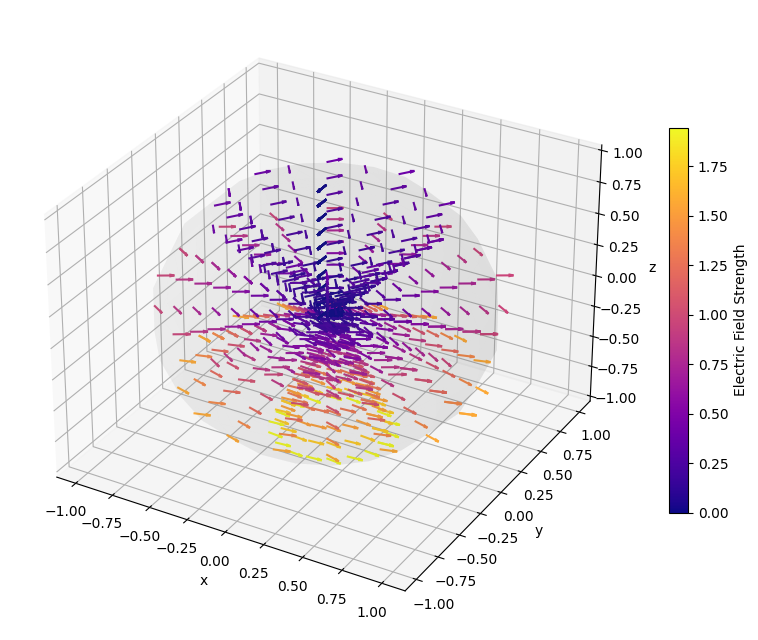

In [47]:
import matplotlib as mpl
def E(r, theta, phi):
    E_r = r * (1 - np.cos(theta))
    E_theta = r * np.sin(theta) / 2
    E_phi = 0 * phi
    
    return E_r, E_theta, E_phi

r_vals = np.linspace(0.001, 1, 10)
theta_vals = np.linspace(0, 2 * np.pi, 10)
phi_vals = np.linspace(0, 2 * np.pi, 10)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')

# Calculate electric field magnitude
E_mag = np.zeros((len(r_vals), len(theta_vals), len(phi_vals)))
for i, r in enumerate(r_vals):
    for j, theta in enumerate(theta_vals):
        for k, phi in enumerate(phi_vals):
            E_r, E_theta, E_phi = E(r, theta, phi)
            E_mag[i, j, k] = np.sqrt(E_r**2 + E_theta**2 + E_phi**2)

# Normalize electric field vectors
E_r_norm = np.zeros_like(E_mag)
E_theta_norm = np.zeros_like(E_mag)
E_phi_norm = np.zeros_like(E_mag)
for i in range(len(r_vals)):
    for j in range(len(theta_vals)):
        for k in range(len(phi_vals)):
            E_r, E_theta, E_phi = E(r_vals[i], theta_vals[j], phi_vals[k])
            E_norm = np.sqrt(E_r**2 + E_theta**2 + E_phi**2)
            E_r_norm[i, j, k] = E_r / E_norm
            E_theta_norm[i, j, k] = E_theta / E_norm
            E_phi_norm[i, j, k] = E_phi / E_norm

# Create colormap for electric field strength
E_mag_flat = E_mag.flatten()
E_mag_min, E_mag_max = E_mag_flat.min(), E_mag_flat.max()
norm = mpl.colors.Normalize(vmin=E_mag_min, vmax=E_mag_max)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.plasma)

# Plot quivers with color-coded electric field strength
for i, r in enumerate(r_vals):
    for j, theta in enumerate(theta_vals):
        for k, phi in enumerate(phi_vals):
            x = r * np.sin(theta) * np.cos(phi)
            y = r * np.sin(theta) * np.sin(phi)
            z = r * np.cos(theta)

            E_r = E_r_norm[i, j, k]
            E_theta = E_theta_norm[i, j, k]
            E_phi = E_phi_norm[i, j, k]

            # Set quiver length to a fixed value and color based on electric field strength
            quiver_length = 0.1
            color = cmap.to_rgba(E_mag[i, j, k])

            ax.quiver(x, y, z, E_r, E_theta, E_phi, length = quiver_length, color = color)

cbar = fig.colorbar(cmap, ax=ax, shrink=0.5)
cbar.set_label('Electric Field Strength')

# Plot sphere to represent the origin
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x_s = np.sin(v)*np.cos(u)
y_s = np.sin(v)*np.sin(u)
z_s = np.cos(v)
ax.plot_surface(x_s, y_s, z_s, color='grey', alpha = 0.05)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [ ]:
r = np.linspace(0.1, 1, 10)
theta = np.linspace(0, np.pi, 20)
phi = np.linspace(0, 2 * np.pi, 20)

# All Constants are unity

R, Theta, Phi = np.meshgrid(r, theta, phi, indexing = 'ij')

X = R * np.sin(Theta) * np.cos(Phi)
Y = R * np.sin(Theta) * np.sin(Phi)
Z = R * np.cos(Theta)

Er = (1 - np.cos(Theta)) / R ** 2
Etheta = np.sin(Theta) / R ** 2
Ephi = 0 * Phi

Ex = Er * np.sin(Theta) * np.cos(Phi) + Etheta * np.cos(Theta) * np.cos(Phi) - Ephi * np.sin(Phi)
Ey = Er * np.sin(Theta) * np.sin(Phi) + Etheta * np.cos(Theta) * np.sin(Phi) + Ephi * np.cos(Phi)
Ez = Er * np.cos(Theta) - Etheta * np.sin(Theta)

E_mag = np.sqrt(Ex ** 2 + Ey ** 2 + Ez ** 2)

Ex_norm = np.zeros_like(Ex)
Ey_norm = np.zeros_like(Ey)
Ez_norm = np.zeros_like(Ez)

nonzero_idx = E_mag > 0
Ex_norm[nonzero_idx] = Ex[nonzero_idx] / E_mag[nonzero_idx]
Ey_norm[nonzero_idx] = Ey[nonzero_idx] / E_mag[nonzero_idx]
Ez_norm[nonzero_idx] = Ez[nonzero_idx] / E_mag[nonzero_idx]

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')

ax.quiver(X, Y, Z, Ex_norm, Ey_norm, Ez_norm, length = 0.5, normalize = True, cmap = 'coolwarm', alpha = 0.6)
sc = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c = E_mag.flatten(), cmap = 'coolwarm')
fig.colorbar(sc)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')